# Computational Linear Algebra: Singular Value Decomposition Homework

In the following homework we decided to explore the topic of *Singular Value Decomposition* used to device a Movie recommendation system like the one used nowdays by many streaming services.

## Dataset Specifications
The dataset we decided to use contains user ratings for movies along with metadata like movie genres, titles, and timestamps.

In particular, we considered a subset of the original _MovieLens_ dataset. Data are distributed into:
- "ratings.csv": which contains all the ratings
- "movies.csv": which contains all the movies information

### Ratings dataset
All ratings are contained in the file "ratings.csv" and are in the following format: userId,movieId,rating,timestamp.
Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).


### Movies dataset
Movie information is in the file "movies.csv" and is in the following
format: movieId,title,genres.
Only movies with at least one rating or tag are included in the dataset.

## Singular Value Decomposition (SVD) - Theory

SVD is a matrix factorization technique for a matrix $A \in \mathbb{C}^{m \times n}$, expressed as:

$$
A = U \Sigma V^H
$$

where:
- $U$ is an orthogonal $m \times m$ matrix with left singular vectors,
- $\Sigma$ is a diagonal $m \times n$ matrix with non-negative singular values,
- $V$ is an orthogonal $n \times n$ matrix with right singular vectors.

Key properties:
- The columns of $U$ are eigenvectors of $A A^T$.
- The columns of $V$ are eigenvectors of $A^T A$.
- The diagonal elements of $\Sigma$ are the singular values, corresponding to the square roots of the eigenvalues of $A A^T$ or $A^T A$.
If $A \in \mathbb{R}^{m \times n}$, the decomposition becomes: $A = U \Sigma V^T$.

### Geometric Interpretation

The SVD represents a matrix transformation as a sequence of three operations:
1. **Rotation by $V^T$**: Aligns the input space with the right singular vectors.
2. **Scaling by $\Sigma$**: Scales along axes defined by the singular vectors.
3. **Rotation by $U$**: Rotates the output space to align with the left singular vectors.

This decomposition helps in understanding and visualizing linear transformations.


In [30]:
# Library import
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

student_1 = 339401
student_2 = 337625

random_code = student_1 + student_2

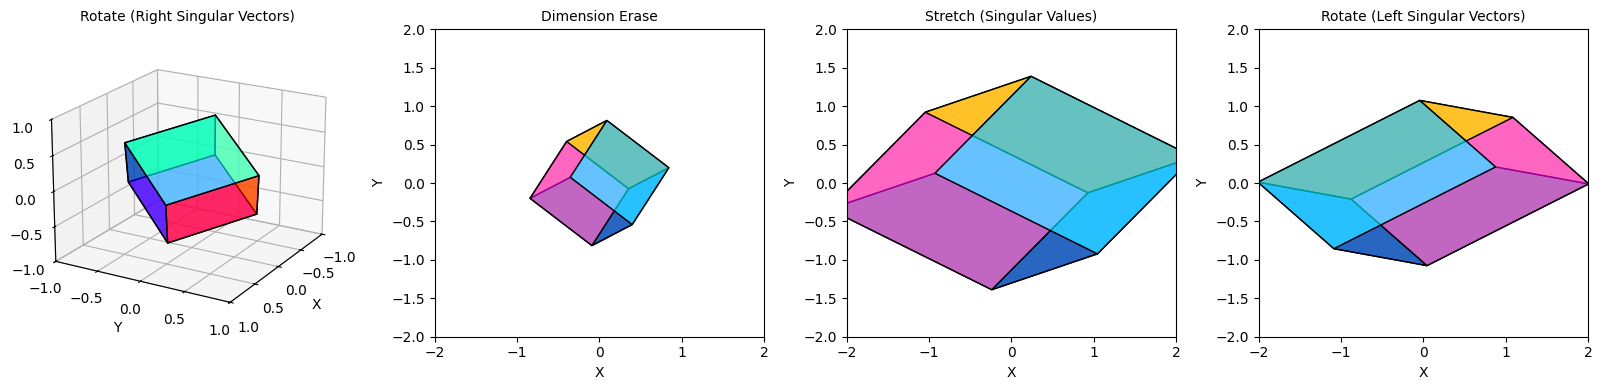

In [31]:
# Define face colors for consistency
face_colors = [
    (1, 0, 0, 0.6),  # Red
    (0, 1, 0, 0.6),  # Green
    (0, 0, 1, 0.6),  # Blue
    (1, 1, 0, 0.6),  # Yellow
    (1, 0, 1, 0.6),  # Magenta
    (0, 1, 1, 0.6)   # Cyan
]

# Function to generate a 3D parallelepiped (unit cube)
def generate_parallelepiped():
    vertices = np.array([
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],  # Bottom face
        [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]   # Top face
    ])
    return vertices - 0.5  # Center the parallelepiped

# Function to apply a linear transformation to vertices
def apply_transformation(vertices, matrix):
    return np.dot(vertices, matrix.T)

# Function to plot a colored parallelepiped in 3D
def plot_parallelepiped_3d(ax, vertices, title):
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Side face
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Side face
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # Side face
        [vertices[4], vertices[7], vertices[3], vertices[0]]   # Side face
    ]
    poly3d = Poly3DCollection(faces, facecolors=face_colors, linewidths=1, edgecolors='k')
    ax.add_collection3d(poly3d)

    ax.set_title(title, fontsize=10)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.view_init(elev=20, azim=30)  # Rotate POV slightly
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

# Function to plot a transformation in 2D with colors
def plot_parallelepiped_2d(ax, vertices, title):
    ax.set_title(title, fontsize=10)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    # Get only the first two dimensions for 2D visualization
    vertices_2d = vertices[:, :2]

    # Define corresponding faces for 2D view
    faces_2d = [
        [vertices_2d[0], vertices_2d[1], vertices_2d[2], vertices_2d[3]],  # Bottom face
        [vertices_2d[4], vertices_2d[5], vertices_2d[6], vertices_2d[7]],  # Top face
        [vertices_2d[0], vertices_2d[1], vertices_2d[5], vertices_2d[4]],  # Side face
        [vertices_2d[2], vertices_2d[3], vertices_2d[7], vertices_2d[6]],  # Side face
        [vertices_2d[1], vertices_2d[2], vertices_2d[6], vertices_2d[5]],  # Side face
        [vertices_2d[4], vertices_2d[7], vertices_2d[3], vertices_2d[0]]   # Side face
    ]

    # Plot each face with the corresponding color
    for face, color in zip(faces_2d, face_colors):
        face.append(face[0])  # Close the polygon
        face = np.array(face)
        ax.fill(face[:, 0], face[:, 1], color=color, edgecolor='k', linewidth=1)

# Define an arbitrary transformation matrix (3x3 for mapping R3 to R3)
A = np.array([[1, 2, 1], [0, 1, -1], [1, 0, 1]])

# Perform SVD decomposition
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Matrices involved in the transformation
rotation1 = Vt  # First rotation (Right singular vectors)
scaling = np.diag(S)  # Scaling matrix (Singular values)
rotation2 = U  # Second rotation (Left singular vectors)

# Original parallelepiped
vertices = generate_parallelepiped()

# Apply transformations
vertices_rot1 = apply_transformation(vertices, rotation1)  # Rotate (3D)
vertices_projected = vertices_rot1[:, :2]  # Dimension Reduction (Drop Z)
vertices_stretch = apply_transformation(vertices_projected, scaling[:2, :2])  # Stretch
vertices_rot2 = apply_transformation(vertices_stretch, rotation2[:2, :2])  # Final Rotate

# Plot results: 3D rotation, dimension reduction, 2D stretch, 2D final rotation
fig = plt.figure(figsize=(16, 4))

# First plot (3D): Rotate by right singular vectors
ax1 = fig.add_subplot(141, projection='3d')
plot_parallelepiped_3d(ax1, vertices_rot1, "Rotate (Right Singular Vectors)")

# Second plot (2D): Dimension Reduction (Projection to 2D)
ax2 = fig.add_subplot(142)
plot_parallelepiped_2d(ax2, vertices_projected, "Dimension Erase")

# Third plot (2D): Stretch by singular values
ax3 = fig.add_subplot(143)
plot_parallelepiped_2d(ax3, vertices_stretch, "Stretch (Singular Values)")

# Fourth plot (2D): Rotate by left singular vectors
ax4 = fig.add_subplot(144)
plot_parallelepiped_2d(ax4, vertices_rot2, "Rotate (Left Singular Vectors)")

plt.tight_layout()
plt.show()

## 1. Dataset preparation
### 1.1 Loading the separate datasets

In [32]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

print("Ratings:")
print(ratings.head())
print("\nMovies:")
print(movies.head())

Ratings:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


### 1.2 Merge DataFrames
We’ll merge the ratings and the movies to create a single dataset for analysis. The ratings are normalized to ensure fair comparison among users.

In [33]:
# Merge ratings with movies
full_data = pd.merge(ratings, movies, on='movieId')

scaler = StandardScaler()
full_data['normalized_rating'] = scaler.fit_transform(full_data[['rating']])


# Display the merged dataset
print("Merged Data:")
full_data.head()

Merged Data:


,userId,movieId,rating,timestamp,title,genres,normalized_rating
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.478112
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,0.478112
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,0.478112
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1.437322
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1.437322


## 2. Split into _train_ and _test_ set
In order to properly test our model, we splitted the dataset into _train_ (80%) and _test_ (20%) by using an hold-out technique .

In [7]:
# Splitting the dataset into 80% training and 20% testing 
train, test = train_test_split(full_data, test_size=0.2, random_state=random_code)

## 3. Weighted SVD (WSVD) for Handling Missing Values in Recommender Systems

**Weighted Singular Value Decomposition (WSVD)** is an extension of standard **SVD** that explicitly accounts for missing values by introducing a weight matrix. This approach avoids bias from simple mean imputation while still leveraging matrix factorization for recommendations.

#### **1. How Does Weighted SVD Work?**
Instead of treating missing values as zeros or averages, WSVD assigns **weights** to known and unknown values:

- **Observed ratings (known values):** Weight = 1  
- **Missing ratings (unknown values):** Weight = 0

1. Define the weight matrix $W$:  
   $$
   W_{ij} = 
   \begin{cases} 
   1 & \text{if } A_{ij} \text{ is a known value}  \\
   0 & \text{if } A_{ij} \text{ is a missing value}
   \end{cases}
   $$

2. Set the missing values of $A$ to 0 to compute the first approximation.

3. Iteratively refine the imputation of missing values:

   1. Compute the rank-$k$ approximated matrix  
    $$
      A_k = U_k \cdot S_k \cdot V_k^\top
      $$

   2. Update Missing Values:  
      $$
      A_{k+1} = W \cdot A + (1 - W) \cdot A_k
      $$
      $A_{k+1}$ keeps the known values from $A$ unchanged and updates the missing values by substituting them with the entries of $A_k$.

   3. Check for convergence: stop if $$\| A_{k+1} - A_k \| < \text{relTol}$$ or if the maximum number of iterations $maxIter$ is reached.


In [8]:
def weighted_svd(R, k=2, max_iter=100, tol=1e-4):
    """
    Performs Weighted SVD using ALS optimization.
    
    Parameters:
    - R: User-Item matrix with missing values filled
    - W: Weight matrix (1 for known, 0 for missing values)
    - k: Number of latent features
    - lambda_reg: Regularization term
    - max_iter: Maximum number of iterations
    - tol: Convergence tolerance
    
    Returns:
    - U: User latent factor matrix
    - S: Singular values (diagonal matrix)
    - V: Item latent factor matrix
    """    
    
    # Weight matrix: 1 for observed ratings, 0 for missing values
    W = (~np.isnan(R)).astype(int)  

    # Fill missing values with zeros (will be updated during optimization)
    R_filled = np.where(np.isnan(R), np.zeros(R.shape), R)

    # Initialize U, S, V using SVD
    U, S, Vt = svds(R_filled, k=k)
    S = np.diag(S)  

    for _ in range(max_iter):
        R_pred = U @ S @ Vt  # Reconstruct ratings
        R_new = W * R_filled + (1 - W) * R_pred  # Only update missing values
        
        # Compute new SVD
        U_new, S_new, Vt_new = svds(R_new, k=k)
        S_new = np.diag(S_new)

        # Convergence check
        if np.linalg.norm(R_new - R_pred) < tol:
            break

        U, S, Vt = U_new, S_new, Vt_new
    
    # Sort singular values and vectors in descending order
    S = np.diag(S)
    sorted_indices = np.argsort(S)[::-1] 
    S = S[sorted_indices]       
    S = np.diag(S)
    U = U[:, sorted_indices]                
    Vt = Vt[sorted_indices, :]             
    return U, S, Vt

## 4. Performing predictions
To perform a prediction of the rating of a movie $y$ from a user $x$ the procedure adopted is the following:
1. We select out of the training dataset the matrices relative to the genres of the movie $y$
2. We perform WSVD on the obtained matrix
3. We assign a similarity to each user, in particular we use the *cosine similarity*
$$
cos(x,\={x}) = \frac{x\cdot \={x}}{||x||||\={x}||}
$$ 
4. We use a KNN (k-nearest neighbors) approach to predict the rating. We retrieve the top `k` most similar users to the test user from the similarity       matrix and predict the new rating according to a weighted average:
     $$
     \text{weighted\_rating} = \frac{\sum (\text{similarities} \times \text{ratings})}{\sum \text{similarities}}
     $$


To evaluate the predictions $\={r}$ made by our model we compute the **RMSE** w.r.t. the actual ratings given by the users $r$ as:
$$
RMSE = \sqrt{\sum_{i=1}^n\frac{(\={r}-r)^2}{n}}
$$

In [9]:
def predict_rating_KM(entry, mat, k, similarity_matrix):
    """Function to predict rating for a given test entry with user-similarity matrix."""
    genres = entry['genres'].split('|')
    
    # Select the correct matrices in the user_category_df
    user_category_df = mat[genres]
    genres = entry['genres'].split('|')
    movie = entry['movieId']
    users_selected = user_category_df.index
    similarity_matrix = similarity_matrix.loc[users_selected, users_selected]
    
    # Find most similar user
    user = entry['userId']
    if user not in mat.index or movie not in user_category_df[genres[0]].columns:
        return 0
    # Find the k most similar users
    similar_users = similarity_matrix.loc[user].nlargest(k).index.tolist()
    # Compute weighted rating using k-NN similarity
    ratings = user_category_df[genres[0], entry['movieId']].loc[similar_users]

    similarities = similarity_matrix.loc[user, ratings.index]
    #print(f"Rating-Similarity: {list(zip(ratings, similarities))}")

    weighted_rating = np.sum(similarities * ratings) / np.sum(similarities)


    return weighted_rating

## 5. Select value of $k$ for WSVD
To select the best value for $k$ (number of latent features in SVD):
- Define a possible list $k = [1, 2, 5, 10, 20]$
- Split _training_ set into _train_ (99%) and _validation_ (1%)
- Predict the ratings for movies in the _validation_ set and evaluate the result using RMSE
- Select the value of $k$ that minimizes the RMSE.

In [10]:
# Define the values for k
K = [1, 2, 5, 10, 20]

rmse_values = {}


for k in K:
    # train and test datasets
    train_fold, test_fold = train_test_split(train, test_size=0.01, random_state=random_code)

    train_fold = train_fold.assign(genres=train_fold['genres'].str.split('|')).explode('genres')
    temp = {}
    for genre in train_fold['genres'].unique():
        temp[genre] = train_fold.loc[train_fold['genres'] == genre].pivot_table(index='userId', columns='movieId', values='normalized_rating')
    mat = pd.concat(temp, axis=1, names=['genre', 'movieId'])

    # Perform Weighted SVD on mat
    U, S, Vt = weighted_svd(mat.values, k=k)
    mat = pd.DataFrame(U @ S @ Vt, index=mat.index, columns=mat.columns)
    print(f"Computed the SVD for k={k}")

    # Compute User-User Cosine Similarity
    km = 5  # Number of nearest neighbors
    user_similarity = cosine_similarity(mat)
    np.fill_diagonal(user_similarity, 0)     # Set diagonal to 0 to ignore self-similarity
    user_sim_df = pd.DataFrame(user_similarity, index=mat.index, columns=mat.index)
        
    ypred = np.zeros(len(test_fold))

    # Apply the function to all rows in test_fold
    test_fold['predicted_rating'] = test_fold.apply(predict_rating_KM, axis=1, mat=mat, k=km, similarity_matrix=user_sim_df)

    # Compute RMSE
    rmse_values[k] = np.sqrt(np.mean((test_fold['normalized_rating'] - test_fold['predicted_rating']) ** 2))
    print(f"RMSE for k={k}: {rmse_values[k]}")
rmse_values_df = pd.DataFrame(list(rmse_values.items()), columns=['k', 'RMSE'])

rmse_values_df

Computed the SVD for k=1
RMSE for k=1: 0.8835758020906775
Computed the SVD for k=2
RMSE for k=2: 0.8435096222245062
Computed the SVD for k=5
RMSE for k=5: 0.8523003569267549
Computed the SVD for k=10
RMSE for k=10: 0.8701791135036301
Computed the SVD for k=20
RMSE for k=20: 0.9030008016295902


,k,RMSE
0,1,0.883576
1,2,0.843510
2,5,0.852300
3,10,0.870179
4,20,0.903001


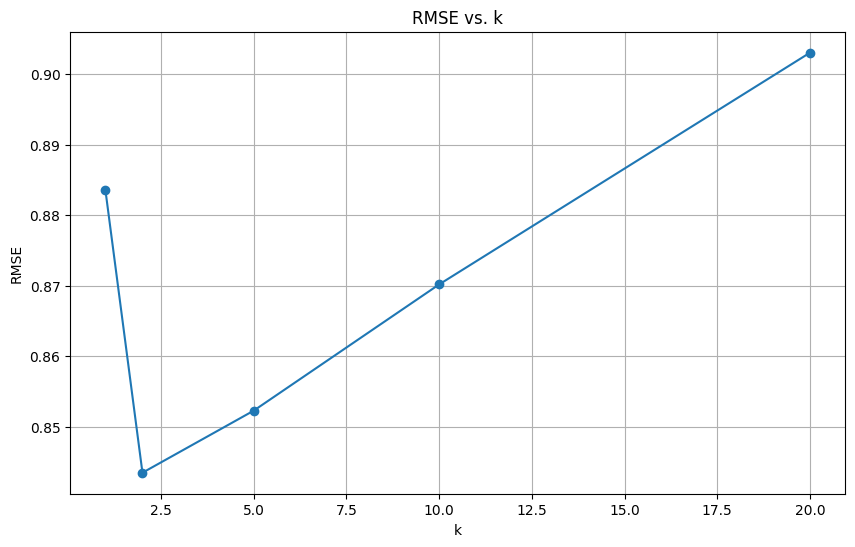

The minimum RMSE is 0.8435096222245062 for k = 2


In [11]:
# Plot the RMSE values
rmse_values_df = pd.DataFrame(list(rmse_values.items()), columns=['k', 'RMSE'])
plt.figure(figsize=(10, 6))
plt.plot(rmse_values_df['k'], rmse_values_df['RMSE'], marker='o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs. k')
plt.grid()
plt.show()
K_optimal = min(rmse_values, key=rmse_values.get)
print(f"The minimum RMSE is {min(rmse_values.values())} for k = {min(rmse_values, key=rmse_values.get)}")

## 6. Apply model to _test_ set

In [35]:
train = train.assign(genres=train['genres'].str.split('|')).explode('genres')
temp = {}
for genre in train_fold['genres'].unique():
    temp[genre] = train.loc[train['genres'] == genre].pivot_table(index='userId', columns='movieId', values='normalized_rating')
mat = pd.concat(temp, axis=1, names=['genre', 'movieId'])
mask  = (np.isnan(mat))
U, S, Vt = weighted_svd(mat.values, k=k)
mat = pd.DataFrame(U @ S @ Vt, index=mat.index, columns=mat.columns)
km = 5  # Number of nearest neighbors
user_similarity = cosine_similarity(mat)
np.fill_diagonal(user_similarity, 0)     # Set diagonal to 0 to ignore self-similarity
user_sim_df = pd.DataFrame(user_similarity, index=mat.index, columns=mat.index)

In [13]:
ypred = np.zeros(len(test))
test['predicted_rating'] = test.apply(predict_rating_KM, axis=1, mat=mat, k=km, similarity_matrix=user_sim_df)

# Compute RMSE
rmse = np.sqrt(np.mean((test['normalized_rating'] - test['predicted_rating']) ** 2))
print(f"RMSE for k={K_optimal}: {rmse}")

RMSE for k=2: 0.9201709225551978


Based on the matrix of predictions we just computed we can recommend the top 5 rated movies based on predicted ratings for user 160.

In [14]:
def plot_genre_wordcloud(user_id, original_data):
    # Filter the data for the given user
    user_data = original_data[original_data['userId'] == user_id]

    # Calculate the average rating for each genre
    genre_ratings = {}
    for genres, rating in zip(user_data['genres'], user_data['rating']):
        for genre in genres.split('|'):
            if genre in genre_ratings:
                genre_ratings[genre].append(rating)
            else:
                genre_ratings[genre] = [rating]

    # Calculate the average rating for each genre
    avg_genre_ratings = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_ratings.items()}

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(avg_genre_ratings)

    # Plot the word cloud
    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Genre WordCloud for User {user_id}')
    plt.show()

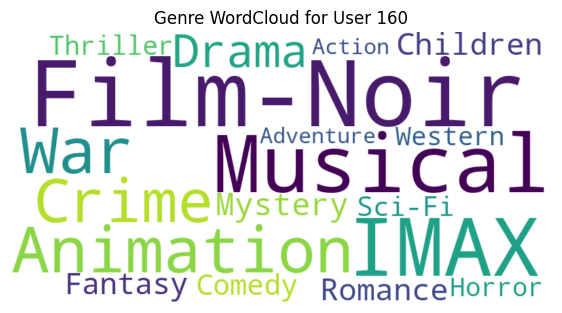

   Movie ID                                       Title  \
0       168                         First Knight (1995)   
1       151                              Rob Roy (1995)   
2     64839                        Wrestler, The (2008)   
3       761                         Phantom, The (1996)   
4      8807  Harold and Kumar Go to White Castle (2004)   

                     Genres  Predicted Rating  
0      Action|Drama|Romance               5.2  
1  Action|Drama|Romance|War               4.6  
2                     Drama               4.5  
3          Action|Adventure               4.2  
4          Adventure|Comedy               4.1  


In [ ]:
# Plot the genre word cloud for the user 160
i = 160
user_id = test[test['userId'] == i]['userId'].values[0]
plot_genre_wordcloud(user_id, full_data)


# Unrated movies are where there are missing values (NaN) in the user-item matrix for this user
unrated_movies = mask.loc[user_id].index[mask.loc[user_id]]  # Filter out rated movies (True means unrated)


# Step 2: Predict ratings for unrated movies
predicted_ratings = []
for movie_id in unrated_movies:
    # Fetch predicted ratings from the 'mat' (user-movie matrix) after the weighted SVD
    predicted_rating = mat.loc[user_id, movie_id]
    predicted_ratings.append((movie_id, predicted_rating))

predicted_ratings = list(set([(movie_id, rating) for ((genre, movie_id), rating) in predicted_ratings]))

# Step 3: Sort movies by predicted ratings in descending order
top_5_predictions = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:5]

# Step 4: Prepare the table for display
columns = ["Movie ID", "Title", "Genres", "Predicted Rating"]
table_data = []

for movie_id, pred_rating in top_5_predictions:
    movie_info = movies[movies['movieId'] == movie_id].iloc[0]
    table_data.append([movie_id, movie_info['title'], movie_info['genres'], round(pred_rating, 1)])

# Step 5: Display the results
recommended_movies = pd.DataFrame(table_data, columns=columns)
print(recommended_movies)


## 7. Compare with baseline
As a baseline model we chose to fill the missing values with the mean computed on the available ratings. Then the same KNN approach as before is applied.

In [23]:
train1 = train.assign(genres=train['genres'].str.split('|')).explode('genres')
temp = {}
for genre in train1['genres'].unique():
    temp[genre] = train1.loc[train1['genres'] == genre].pivot_table(index='userId', columns='movieId', values='normalized_rating')
mat = pd.concat(temp, axis=1, names=['genre', 'movieId'])

# Fill missing values with the global mean
global_mean = np.nanmean(mat.to_numpy())
mat = mat.fillna(global_mean)

# Compute User-User Cosine Similarity
km = 5  # Number of nearest neighbors
user_similarity = cosine_similarity(mat)
# Set diagonal to 0 to ignore self-similarity
np.fill_diagonal(user_similarity, 0) 
user_sim_df = pd.DataFrame(user_similarity, index=mat.index, columns=mat.index)

ypred = np.zeros(len(test))
test['predicted_rating'] = test.apply(predict_rating_KM, axis=1, mat=mat, k=km, similarity_matrix=user_sim_df)

# Compute RMSE
rmse = np.sqrt(np.mean((test['normalized_rating'] - test['predicted_rating']) ** 2))
print(f"RMSE for KNN without SVD: {rmse}")

RMSE for KNN without SVD: 0.9563039399418394
